In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, precision_score, precision_recall_curve, roc_curve, auc, confusion_matrix,classification_report 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint

In [40]:
df_train=pd.read_csv('training_data_cleansed.csv')
#df_train=pd.read_csv('training_data_cleansed_no_2009.csv')

In [156]:
print len(df_train)
df_train=df_train[df_train['year']!=2009]
print len(df_train)

40876
40876


In [168]:
len(adv_reac_70_train)

40876

In [42]:
df_test=pd.read_csv('predicting_data_cleansed.csv')

In [43]:
adv_reac_train=pd.read_csv('col_1_train.csv')

In [44]:
adv_reac_test=pd.read_csv('col_1_test.csv')

In [45]:
adv_reac_bool_train=pd.read_csv('col_1_bool_train.csv')

In [46]:
adv_reac_bool_test=pd.read_csv('col_1_bool_test.csv')

In [173]:
adv_reac_70_train=pd.read_csv('col_1_70_train.csv')
adv_reac_70_test=pd.read_csv('col_1_70_test.csv')
adv_reac_70_bool_train=pd.read_csv('col_1_70_plus_bool_train.csv')
adv_reac_70_bool_test=pd.read_csv('col_1_70_plus_bool_test.csv')

In [160]:
print len(adv_reac_70_train)
print len(adv_reac_70_bool_train)



40876
43952


In [48]:
spl_train=pd.read_csv('col_9_train.csv')
spl_test=pd.read_csv('col_9_test.csv')
spl_bool_train=pd.read_csv('col_9_bool_train.csv')
spl_bool_test=pd.read_csv('col_9_bool_test.csv')

In [49]:
y_train=df_train['target'][df_train['year']!=2009]
y_test=df_test['target']

In [117]:
rfc=RandomForestClassifier(n_jobs=-1,class_weight='balanced',random_state=100)

In [118]:
rfc.get_params()

{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

In [119]:
hyperparameters={
    'criterion': ['gini','entropy'],
    'n_estimators': [30,300],
    'min_samples_leaf': [1, 5]
    }

In [170]:
param_dist = {"max_depth": [3, None],
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators": sp_randint(10,500)
             }

In [120]:
grid_search=GridSearchCV(rfc,hyperparameters,scoring='recall')
grid_search_spl=GridSearchCV(rfc,hyperparameters,scoring='recall')
grid_search_70=GridSearchCV(rfc,hyperparameters,scoring='recall')

In [171]:
random_search=RandomizedSearchCV(rfc,param_dist,scoring='recall',n_iter=100,n_jobs=-1)


In [238]:
random_search_spl=RandomizedSearchCV(rfc,param_dist,scoring='recall',n_iter=10,n_jobs=-1)

In [241]:
random_search_70=RandomizedSearchCV(rfc,param_dist,scoring='recall',n_iter=100,n_jobs=-2)

In [172]:
random_search.fit(adv_reac_train,y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1107c8590>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11674cf90>, 'criterion': ['gini', 'entropy'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x116f61e50>, 'max_depth': [3, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, 

In [240]:
random_search_spl.fit(spl_train,y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1107c8590>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11674cf90>, 'criterion': ['gini', 'entropy'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x116f61e50>, 'max_depth': [3, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, s

In [242]:
random_search_70.fit(adv_reac_70_train,y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=-2,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1107c8590>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11674cf90>, 'criterion': ['gini', 'entropy'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x116f61e50>, 'max_depth': [3, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, 

In [125]:
grid_search.fit(adv_reac_train,y_train)



GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 300], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [126]:
grid_search_spl.fit(spl_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 300], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [122]:
grid_search_70.fit(adv_reac_70_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 300], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [243]:
print grid_search.best_estimator_
print grid_search_spl.best_estimator_
print grid_search_70.best_estimator_
print random_search.best_estimator_
print random_search_spl.best_estimator_
print random_search_70.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples

In [244]:
print grid_search.best_score_
print grid_search_spl.best_score_
print grid_search_70.best_score_
print random_search.best_score_
print random_search_spl.best_score_
print random_search_70.best_score_

0.189389306016
0.159087017054
0.295447317386
0.537869521124
0.492413307653
0.515140024375


In [245]:
print grid_search.best_params_
print grid_search_spl.best_params_
print grid_search_70.best_params_
print random_search.best_params_
print random_search_spl.best_params_
print random_search_70.best_params_

{'n_estimators': 30, 'criterion': 'entropy', 'min_samples_leaf': 5}
{'n_estimators': 30, 'criterion': 'entropy', 'min_samples_leaf': 5}
{'n_estimators': 300, 'criterion': 'entropy', 'min_samples_leaf': 5}
{'bootstrap': False, 'min_samples_leaf': 7, 'n_estimators': 194, 'criterion': 'gini', 'min_samples_split': 7, 'max_depth': 3}
{'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 309, 'criterion': 'gini', 'min_samples_split': 9, 'max_depth': 3}
{'bootstrap': False, 'min_samples_leaf': 5, 'n_estimators': 99, 'criterion': 'entropy', 'min_samples_split': 9, 'max_depth': 3}


In [246]:
best=grid_search.best_estimator_
best_spl=grid_search_spl.best_estimator_
best_70=grid_search_70.best_estimator_
best_rand=random_search.best_estimator_
best_rand_spl=random_search_spl.best_estimator_
best_rand_70=random_search_70.best_estimator_

In [131]:
best.fit(adv_reac_train,y_train)
best_spl.fit(spl_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [132]:
best_70.fit(adv_reac_70_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [178]:
best_rand.fit(adv_reac_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=7, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=194, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [247]:
best_rand_spl.fit(spl_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=9,
            min_weight_fraction_leaf=0.0, n_estimators=309, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [248]:
best_rand_70.fit(adv_reac_70_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='entropy', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=9,
            min_weight_fraction_leaf=0.0, n_estimators=99, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [249]:
predictions_train=best.predict(adv_reac_train)
predictions_test=best.predict(adv_reac_test)
predictions_spl_train=best_spl.predict(spl_train)
predictions_spl_test=best_spl.predict(spl_test)
predictions_70_train=best_70.predict(adv_reac_70_train)
predictions_70_test=best_70.predict(adv_reac_70_test)
predictions_rand_train=best_rand.predict(adv_reac_train)
predictions_rand_test=best_rand.predict(adv_reac_test)

predictions_rand_spl_train=best_rand_spl.predict(spl_train)
predictions_rand_spl_test=best_rand_spl.predict(spl_test)

predictions_rand_70_train=best_rand_70.predict(adv_reac_70_train)
predictions_rand_70_test=best_rand_70.predict(adv_reac_70_test)


In [250]:
print recall_score(y_train,predictions_train)
print recall_score(y_test,predictions_test)
print '\n'
print precision_score(y_train,predictions_train)
print precision_score(y_test,predictions_test)
print '\n'
print recall_score(y_train,predictions_spl_train)
print recall_score(y_test,predictions_spl_test)
print '\n'
print precision_score(y_train,predictions_spl_train)
print precision_score(y_test, predictions_spl_test)
print '\n'
print recall_score(y_train,predictions_70_train)
print recall_score(y_test, predictions_70_test)
print '\n'
print precision_score(y_train,predictions_70_train)
print precision_score(y_test, predictions_70_test)
print '\n'
print recall_score(y_train,predictions_rand_train)
print recall_score(y_test, predictions_rand_test)

print '\n'
print precision_score(y_train,predictions_rand_train)
print precision_score(y_test, predictions_rand_test)
print '\n'
print recall_score(y_train,predictions_rand_spl_train)
print recall_score(y_test, predictions_rand_spl_test)
print '\n'

print precision_score(y_train,predictions_rand_spl_train)
print precision_score(y_test, predictions_rand_spl_test)
print '\n'
print recall_score(y_train,predictions_rand_70_train)
print recall_score(y_test, predictions_rand_70_test)
print '\n'
print precision_score(y_train,predictions_rand_70_train)
print precision_score(y_test, predictions_rand_70_test)

0.931818181818
0.0266666666667


0.372727272727
0.021978021978


0.954545454545
0.0


0.572727272727
0.0


1.0
0.02


0.4
0.0167597765363


0.643939393939
0.26


0.0311013538236
0.0113570180547


0.818181818182
0.0


0.0557275541796
0.0


0.643939393939
0.293333333333


0.019495412844
0.00792649972978


In [251]:
cm_train=pd.DataFrame(confusion_matrix(y_train,predictions_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_spl_train=pd.DataFrame(confusion_matrix(y_train,predictions_spl_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_70_train=pd.DataFrame(confusion_matrix(y_train,predictions_70_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_rand_train=pd.DataFrame(confusion_matrix(y_train,predictions_rand_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])

cm_rand_spl_train=pd.DataFrame(confusion_matrix(y_train,predictions_rand_spl_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])

cm_rand_70_train=pd.DataFrame(confusion_matrix(y_train,predictions_rand_70_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])

In [253]:
print 'Adverse Reactions Training\n',cm_train
print 'Product Labeling Training\n',cm_spl_train
print 'Adverse Reactions 70%PCA Training\n',cm_70_train
print 'Adverse Reactions Training - RandomSearch\n',cm_rand_train
print 'Product Labeling Training - RandomSearch\n',cm_rand_spl_train
print 'Adverse Reactions 70%PCA Training - RandomSearch\n',cm_rand_70_train

 Adverse Reactions Training
          Pred. 0  Pred. 1
Actual 0    40537      207
Actual 1        9      123
Product Labeling Training
          Pred. 0  Pred. 1
Actual 0    40650       94
Actual 1        6      126
Adverse Reactions 70%PCA Training
          Pred. 0  Pred. 1
Actual 0    40546      198
Actual 1        0      132
Adverse Reactions Training - RandomSearch
          Pred. 0  Pred. 1
Actual 0    38096     2648
Actual 1       47       85
Product Labeling Training - RandomSearch
          Pred. 0  Pred. 1
Actual 0    38914     1830
Actual 1       24      108
Adverse Reactions 70%PCA Training - RandomSearch
          Pred. 0  Pred. 1
Actual 0    36469     4275
Actual 1       47       85


In [254]:
cm_test=pd.DataFrame(confusion_matrix(y_test,predictions_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_spl_test=pd.DataFrame(confusion_matrix(y_test,predictions_spl_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_70_test=pd.DataFrame(confusion_matrix(y_test,predictions_70_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_rand_test=pd.DataFrame(confusion_matrix(y_test,predictions_rand_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])

cm_rand_spl_test=pd.DataFrame(confusion_matrix(y_test,predictions_rand_spl_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])

cm_rand_70_test=pd.DataFrame(confusion_matrix(y_test,predictions_rand_70_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])

In [255]:
print 'Adverse Reactions Testing\n',cm_test
print 'Product Labeling Testing\n',cm_spl_test
print 'Adverse Reactions 70%PCA Testing\n',cm_70_test
print 'Adverse Reactions Testing - RandomSearch\n',cm_rand_test
print 'Product Labeling Testing - RandomSearch\n',cm_rand_spl_test
print 'Adverse Reactions 70%PCA Testing - RandomSearch\n',cm_rand_70_test

Adverse Reactions Testing
          Pred. 0  Pred. 1
Actual 0    43624      178
Actual 1      146        4
Product Labeling Testing
          Pred. 0  Pred. 1
Actual 0    43802        0
Actual 1      150        0
Adverse Reactions 70%PCA Testing
          Pred. 0  Pred. 1
Actual 0    43626      176
Actual 1      147        3
Adverse Reactions Testing - RandomSearch
          Pred. 0  Pred. 1
Actual 0    40407     3395
Actual 1      111       39
Product Labeling Testing - RandomSearch
          Pred. 0  Pred. 1
Actual 0    43756       46
Actual 1      150        0
Adverse Reactions 70%PCA Testing - RandomSearch
          Pred. 0  Pred. 1
Actual 0    38295     5507
Actual 1      106       44


In [69]:
##############################

In [143]:
rfc_2=RandomForestClassifier(n_jobs=-1,class_weight='balanced',random_state=100)

In [256]:
grid_search_2=GridSearchCV(rfc_2,hyperparameters,scoring='recall')
grid_search_2_spl=GridSearchCV(rfc_2,hyperparameters,scoring='recall')
grid_search_2_70=GridSearchCV(rfc_2,hyperparameters,scoring='recall')
random_search_2=RandomizedSearchCV(rfc_2,param_dist,scoring='recall',n_iter=100,n_jobs=-2)
random_search_2_70=RandomizedSearchCV(rfc_2,param_dist,scoring='recall',n_iter=100,n_jobs=-2)

In [92]:
for col in spl_bool_train:
    spl_bool_train[col]=spl_bool_train[col].fillna(0)

In [188]:
for col in adv_reac_bool_train:
    adv_reac_bool_train[col]=adv_reac_bool_train[col].fillna(0)

In [189]:
adv_reac_bool_train.isnull().sum()

Unnamed: 0                             0
0                                      0
1                                      0
2                                      0
3                                      0
4                                      0
5                                      0
6                                      0
7                                      0
8                                      0
9                                      0
10                                     0
11                                     0
12                                     0
13                                     0
14                                     0
15                                     0
16                                     0
17                                     0
18                                     0
19                                     0
20                                     0
21                                     0
22                                     0
23              

In [197]:
grid_search_2.fit(adv_reac_bool_train,y_train)


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 300], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [198]:
grid_search_2_spl.fit(spl_bool_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 300], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [192]:
for col in adv_reac_70_bool_train:
    adv_reac_70_bool_train[col]=adv_reac_70_bool_train[col].fillna(0)

In [193]:
adv_reac_70_bool_train.isnull().sum()

Unnamed: 0                               0
0                                        0
1                                        0
2                                        0
3                                        0
4                                        0
5                                        0
6                                        0
7                                        0
8                                        0
9                                        0
10                                       0
11                                       0
12                                       0
13                                       0
14                                       0
15                                       0
16                                       0
17                                       0
18                                       0
19                                       0
20                                       0
21                                       0
22         

In [194]:
grid_search_2_70.fit(adv_reac_70_bool_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 300], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=0)

In [195]:
random_search_2.fit(adv_reac_bool_train,y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=-2,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1107c8590>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11674cf90>, 'criterion': ['gini', 'entropy'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x116f61e50>, 'max_depth': [3, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, 

In [257]:
random_search_2_70.fit(adv_reac_70_bool_train,y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=-2,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1107c8590>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x11674cf90>, 'criterion': ['gini', 'entropy'], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x116f61e50>, 'max_depth': [3, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, 

In [259]:
print grid_search_2.best_estimator_
print grid_search_2_spl.best_estimator_
print grid_search_2_70.best_estimator_
print random_search_2.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [261]:

print random_search_2_70.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=9, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)


In [ ]:
print grid_search_2.best_score_
print grid_search_2_spl.best_score_
print grid_search_2_70.best_score_
print random_search_2.best_score_


In [262]:
print random_search_2_70.best_score_

0.537867853108


In [263]:
print grid_search_2.best_params_
print grid_search_2_spl.best_params_
print grid_search_2_70.best_params_
print random_search_2.best_params_
print random_search_2_70.best_params_

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [264]:
best_2=grid_search_2.best_estimator_
best_2_spl=grid_search_2_spl.best_estimator_
best_2_70=grid_search_2_70.best_estimator_
best_2_rand=random_search_2.best_estimator_


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [298]:
best_2_rand

RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=3, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=482, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [265]:
best_2_rand_70=random_search_2_70.best_estimator_

In [203]:
best_2.fit(adv_reac_bool_train,y_train)
best_2_spl.fit(spl_bool_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [204]:
best_2_70.fit(adv_reac_70_bool_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [205]:
best_2_rand.fit(adv_reac_bool_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=3, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=482, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [266]:
best_2_rand_70.fit(adv_reac_70_bool_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
            criterion='gini', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=9, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=-1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [267]:
predictions_2_train=best_2.predict(adv_reac_bool_train)
predictions_2_test=best_2.predict(adv_reac_bool_test)
predictions_2_spl_train=best_2_spl.predict(spl_bool_train)
predictions_2_spl_test=best_2_spl.predict(spl_bool_test)
predictions_2_70_train=best_2_70.predict(adv_reac_70_bool_train)
predictions_2_70_test=best_2_70.predict(adv_reac_70_bool_test)
predictions_2_rand_train=best_2_rand.predict(adv_reac_bool_train)
predictions_2_rand_test=best_2_rand.predict(adv_reac_bool_test)

predictions_2_rand_70_train=best_2_rand_70.predict(adv_reac_70_bool_train)
predictions_2_rand_70_test=best_2_rand_70.predict(adv_reac_70_bool_test)

In [268]:
print recall_score(y_train,predictions_2_train)
print recall_score(y_test,predictions_2_test)
print '\n'
print precision_score(y_train,predictions_2_train)
print precision_score(y_test,predictions_2_test)
print '\n'
print recall_score(y_train,predictions_2_spl_train)
print recall_score(y_test,predictions_2_spl_test)
print '\n'
print precision_score(y_train,predictions_2_spl_train)
print precision_score(y_test,predictions_2_spl_test)
print '\n'
print recall_score(y_train,predictions_2_70_train)
print recall_score(y_test,predictions_2_70_test)
print '\n'
print precision_score(y_train,predictions_2_70_train)
print precision_score(y_test,predictions_2_70_test)
print '\n'
print recall_score(y_train,predictions_2_rand_train)
print recall_score(y_test,predictions_2_rand_test)
print '\n'
print precision_score(y_train,predictions_2_rand_train)
print precision_score(y_test,predictions_2_rand_test)

print '\n'
print recall_score(y_train,predictions_2_rand_70_train)
print recall_score(y_test,predictions_2_rand_70_test)
print '\n'
print precision_score(y_train,predictions_2_rand_70_train)
print precision_score(y_test,predictions_2_rand_70_test)

0.916666666667
0.02


0.159210526316
0.00433526011561


0.962121212121
0.0


0.596244131455
0.0


0.863636363636
0.00666666666667


0.207272727273
0.0018315018315


0.643939393939
0.42


0.028071334214
0.0160714285714


0.643939393939
0.52


0.0139435695538
0.0105107128419


In [269]:
cm_2_train=pd.DataFrame(confusion_matrix(y_train,predictions_2_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_2_spl_train=pd.DataFrame(confusion_matrix(y_train,predictions_2_spl_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_2_70_train=pd.DataFrame(confusion_matrix(y_train,predictions_2_70_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_2_rand_train=pd.DataFrame(confusion_matrix(y_train,predictions_2_rand_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_2_rand_70_train=pd.DataFrame(confusion_matrix(y_train,predictions_2_rand_70_train), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])

In [270]:
print 'Adverse Reactions +Bool Training\n',cm_2_train

print 'Product Labeling +Bool Training\n',cm_2_spl_train
print 'Adverse Reactions 70%PCA +Bool Training\n',cm_2_70_train
print 'Adverse Reactions +Bool Training - RandomSearch\n',cm_2_rand_train
print 'Adverse Reactions 70%PCA +Bool Training - RandomSearch\n',cm_2_rand_70_train

Adverse Reactions +Bool Training
          Pred. 0  Pred. 1
Actual 0    40105      639
Actual 1       11      121
Product Labeling +Bool Training
          Pred. 0  Pred. 1
Actual 0    40658       86
Actual 1        5      127
Adverse Reactions 70%PCA +Bool Training
          Pred. 0  Pred. 1
Actual 0    40308      436
Actual 1       18      114
Adverse Reactions +Bool Training - RandomSearch
          Pred. 0  Pred. 1
Actual 0    37801     2943
Actual 1       47       85
Adverse Reactions 70%PCA +Bool Training - RandomSearch
          Pred. 0  Pred. 1
Actual 0    34733     6011
Actual 1       47       85


In [271]:
cm_2_test=pd.DataFrame(confusion_matrix(y_test,predictions_2_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_2_spl_test=pd.DataFrame(confusion_matrix(y_test,predictions_2_spl_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_2_70_test=pd.DataFrame(confusion_matrix(y_test,predictions_2_70_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_2_rand_test=pd.DataFrame(confusion_matrix(y_test,predictions_2_rand_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_2_rand_70_test=pd.DataFrame(confusion_matrix(y_test,predictions_2_rand_70_test), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])

In [297]:
print 'Adverse Reactions +Bool Testing\n',cm_2_test
print 'Product Labeling +Bool Testing\n',cm_2_spl_test
print 'Adverse Reactions 70%PCA +Bool Testing\n',cm_2_70_test
print 'Adverse Reactions +Bool Testing - RandomSearch\n',cm_2_rand_test
print 'Adverse Reactions 70%PCA +Bool Testing - RandomSearch\n',cm_2_rand_70_test

Adverse Reactions +Bool Testing
          Pred. 0  Pred. 1
Actual 0    43113      689
Actual 1      147        3
Product Labeling +Bool Testing
          Pred. 0  Pred. 1
Actual 0    43802        0
Actual 1      150        0
Adverse Reactions 70%PCA +Bool Testing
          Pred. 0  Pred. 1
Actual 0    43257      545
Actual 1      149        1
Adverse Reactions +Bool Testing - RandomSearch
          Pred. 0  Pred. 1
Actual 0    39945     3857
Actual 1       87       63
Adverse Reactions 70%PCA +Bool Testing - RandomSearch
          Pred. 0  Pred. 1
Actual 0    36459     7343
Actual 1       72       78


In [295]:
# print 'Adv. Reac. RandSearch no Bool\n',cm_rand_test
# print 'Adv. Reac. RandSearch yes Bool\n',cm_2_rand_test

# print 'Adv. Reac. RandSearch no Bool+70%PCA\n',cm_rand_70_test
# print 'Adv. Reac. RandSearch yes Bool+70%PCA\n',cm_2_rand_70_test

In [294]:
print 'Recall train\n',recall_score(y_train,predictions_2_rand_train)
print 'Recall test\n',recall_score(y_test,predictions_2_rand_test)
print '\n'
print 'Precision train\n',precision_score(y_train,predictions_2_rand_train)
print 'Precision test\n',precision_score(y_test,predictions_2_rand_test)

print '\n'
print 'w. PCA Recall train\n',recall_score(y_train,predictions_2_rand_70_train)
print 'w. PCA Recall test\n',recall_score(y_test,predictions_2_rand_70_test)
print '\n'
print 'w. PCA Precision train\n',precision_score(y_train,predictions_2_rand_70_train)
print 'w. PCA Precisin test\n',precision_score(y_test,predictions_2_rand_70_test)

Recall train
0.643939393939
Recall test
0.42


Precision train
0.028071334214
Precision test
0.0160714285714


w. PCA Recall train
0.643939393939
w. PCA Recall test
0.52


w. PCA Precision train
0.0139435695538
w. PCA Precisin test
0.0105107128419


In [276]:
total_predictions=pd.Series(predictions_rand_test+predictions_2_rand_test)
total_predictions_70=pd.Series(predictions_rand_70_test+predictions_2_rand_70_test)

In [278]:
print total_predictions.value_counts()
print total_predictions_70.value_counts()

0    39616
2     3018
1     1318
dtype: int64
0    35707
2     4727
1     3518
dtype: int64


In [279]:
total_predictions_no_2s=total_predictions.apply(lambda x: 1 if (x==2)|(x==1) else 0)

In [280]:
total_predictions_70_no_2s=total_predictions_70.apply(lambda x: 1 if (x==2)|(x==1) else 0)

In [281]:
cm_total_predictions=pd.DataFrame(confusion_matrix(y_test,total_predictions_no_2s), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])
cm_total_predictions_70=pd.DataFrame(confusion_matrix(y_test,total_predictions_70_no_2s), columns=['Pred. 0','Pred. 1'],index=['Actual 0','Actual 1'])

In [283]:
print cm_total_predictions,'\n'
print cm_total_predictions_70

          Pred. 0  Pred. 1
Actual 0    39532     4270
Actual 1       84       66 

          Pred. 0  Pred. 1
Actual 0    35635     8167
Actual 1       72       78


In [285]:
#### 

In [292]:
print 'Adv. Reac. RandSearch no Bool TRAIN\n'
print classification_report(y_train,predictions_rand_train)
print 'Adv. Reac. RandSearh yes Bool TRAIN\n'
print classification_report(y_train,predictions_2_rand_train)
print 'Adv. Reac. RandSearch no Bool 70%PCA TRAIN\n'
print classification_report(y_train,predictions_rand_70_train)
print 'Adv. Reac. RandSearch yes Bool 70%PCA TRAIN\n'
print classification_report(y_train,predictions_2_rand_70_train)

Adv. Reac. RandSearch no Bool TRAIN

             precision    recall  f1-score   support

          0       1.00      0.94      0.97     40744
          1       0.03      0.64      0.06       132

avg / total       1.00      0.93      0.96     40876

Adv. Reac. RandSearh yes Bool TRAIN

             precision    recall  f1-score   support

          0       1.00      0.93      0.96     40744
          1       0.03      0.64      0.05       132

avg / total       1.00      0.93      0.96     40876

Adv. Reac. RandSearch no Bool 70%PCA TRAIN

             precision    recall  f1-score   support

          0       1.00      0.90      0.94     40744
          1       0.02      0.64      0.04       132

avg / total       1.00      0.89      0.94     40876

Adv. Reac. RandSearch yes Bool 70%PCA TRAIN

             precision    recall  f1-score   support

          0       1.00      0.85      0.92     40744
          1       0.01      0.64      0.03       132

avg / total       1.00      0.8

In [299]:
# print 'Adv. Reac. RandSearch no Bool TEST\n'
# print classification_report(y_test,predictions_rand_test)
print 'Adv. Reac. RandSearh yes Bool TEST\n'
print classification_report(y_test,predictions_2_rand_test)
# print 'Adv. Reac. RandSearch no Bool 70%PCA TEST\n'
# print classification_report(y_test,predictions_rand_70_test)
print 'Adv. Reac. RandSearch yes Bool 70%PCA TEST\n'
print classification_report(y_test,predictions_2_rand_70_test)

Adv. Reac. RandSearh yes Bool TEST

             precision    recall  f1-score   support

          0       1.00      0.91      0.95     43802
          1       0.02      0.42      0.03       150

avg / total       0.99      0.91      0.95     43952

Adv. Reac. RandSearch yes Bool 70%PCA TEST

             precision    recall  f1-score   support

          0       1.00      0.83      0.91     43802
          1       0.01      0.52      0.02       150

avg / total       0.99      0.83      0.90     43952



In [300]:
7343-3857

3486

In [303]:
7343/78.0

94.14102564102564

In [113]:
12/150.0

0.08

In [114]:
#################

In [128]:
probablities_train=best_2.predict_proba(adv_reac_bool_train)
probablities_test=best_2.predict_proba(adv_reac_bool_test)



[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Do

In [129]:
probabilities_train

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       ..., 
       [ 0.31676327,  0.68323673],
       [ 0.59869463,  0.40130537],
       [ 0.07500187,  0.92499813]])

In [130]:
fp_train, tp_train, thresholds_train = roc_curve(y_train, probabilities_train[:,1], pos_label=1)

In [133]:
thresholds_train

array([  9.99244583e-01,   9.90632591e-01,   9.85564777e-01, ...,
         1.22833555e-04,   1.16094139e-04,   0.00000000e+00])

In [132]:
auc(fp_train, tp_train)

0.98475874604949531

In [ ]:
plt.plot(fp_train, tp_train)
plt.plot([0, 1], [0, 1], linestyle='--')

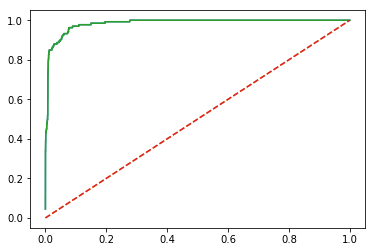

In [137]:
plt.plot(fp_train, tp_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [138]:
fp_test, tp_test, thresholds_test = roc_curve(y_test, probabilities_test[:,1], pos_label=1)

In [139]:
auc(fp_test, tp_test)

0.45506346742157888

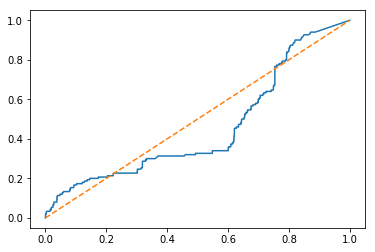

In [140]:
plt.plot(fp_test, tp_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [144]:
p_train,r_train,thresh_train=precision_recall_curve(y_train, probabilities_train[:,1], pos_label=1)

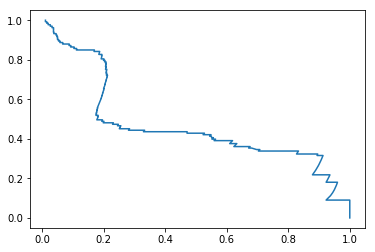

In [154]:
plt.plot(p_train, r_train)

plt.show()

In [146]:
p_test,r_test,thresh_test=precision_recall_curve(y_test, probabilities_test[:,1], pos_label=1)

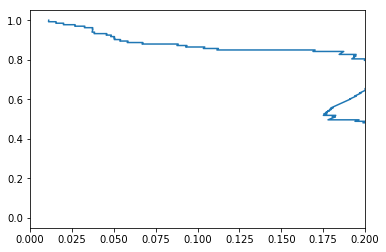

In [153]:
plt.plot(p_train, r_train)
plt.xlim(0,0.2)
plt.show()